## Import Library

In [642]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import matplotlib
df = pd.read_csv('Cars.csv')


## Load Data

In [643]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [644]:
#Check amount of data
df.shape

(8128, 13)

In [645]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [647]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Feature Mapping

In [648]:
#Data Mapping, First Owner = 1, ... , Test Drive Car = 5
df["owner"].unique()

mapping = {"First Owner" : 1, "Second Owner" : 2, "Third Owner" : 3, "Fourth & Above Owner" : 4, "Test Drive Car" : 5}

df["owner"] = df["owner"].map(mapping)

df["owner"].unique()

array([1, 2, 3, 4, 5])

In [649]:
df = df[~df["fuel"].isin(["CNG", "LPG"])]

In [650]:
df["mileage"] = df["mileage"].str.split().str[0]

df["mileage"] = df["mileage"].astype(float)

In [651]:
df["engine"] = df["engine"].str.split().str[0]

df["engine"] = df["engine"].astype(float)

In [652]:
df["max_power"] = df["max_power"].str.split().str[0]

df["max_power"] = df["max_power"].astype(float)

In [653]:
df["name"] = df["name"].str.split(" ").str[0]

In [654]:
df = df.drop(columns=['torque'])

In [655]:
df = df[df['owner'] != 5]

In [656]:
y = np.log(df['selling_price'])

In [657]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [658]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [659]:
#renaming column 'name' to 'brand'
df.rename(columns= {
    'name': 'brand'}, inplace= True)

df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

## Univariate Analysis

<Axes: xlabel='owner', ylabel='count'>

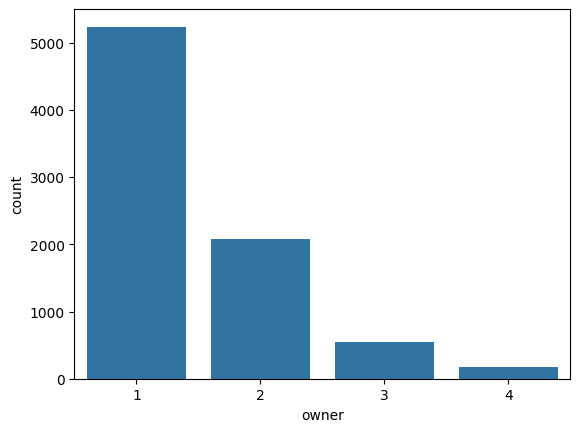

In [660]:
#How many different owners are there?
sns.countplot(data = df, x = 'owner')

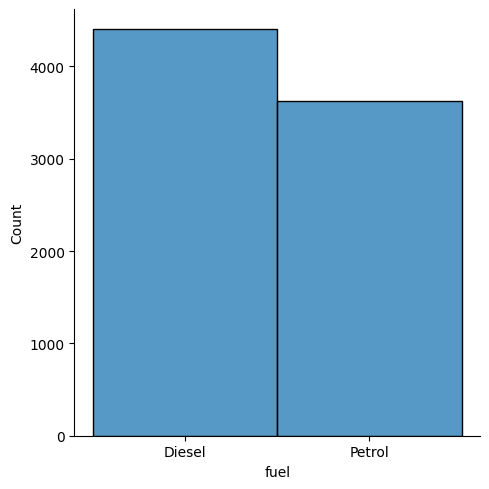

In [661]:
sns.displot(data = df, x = 'fuel')

Text(0.5, 0, 'Fuel')

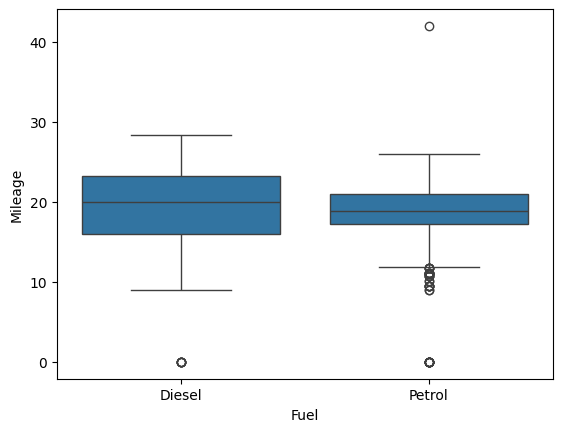

In [662]:
#Multivariate Analysis
sns.boxplot(x = df["fuel"], y = df["mileage"]);
plt.ylabel("Mileage")
plt.xlabel("Fuel")

<Axes: xlabel='mileage', ylabel='selling_price'>

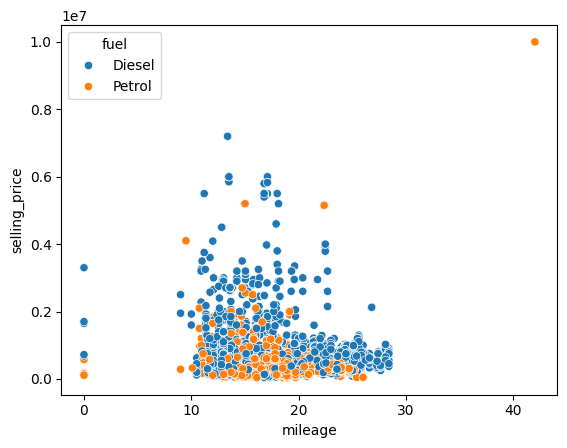

In [663]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

In [664]:
from sklearn.preprocessing import LabelEncoder
#do label encoding for fuel
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])

#do label encoding for transmission
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])

## Heat Map

<Axes: >

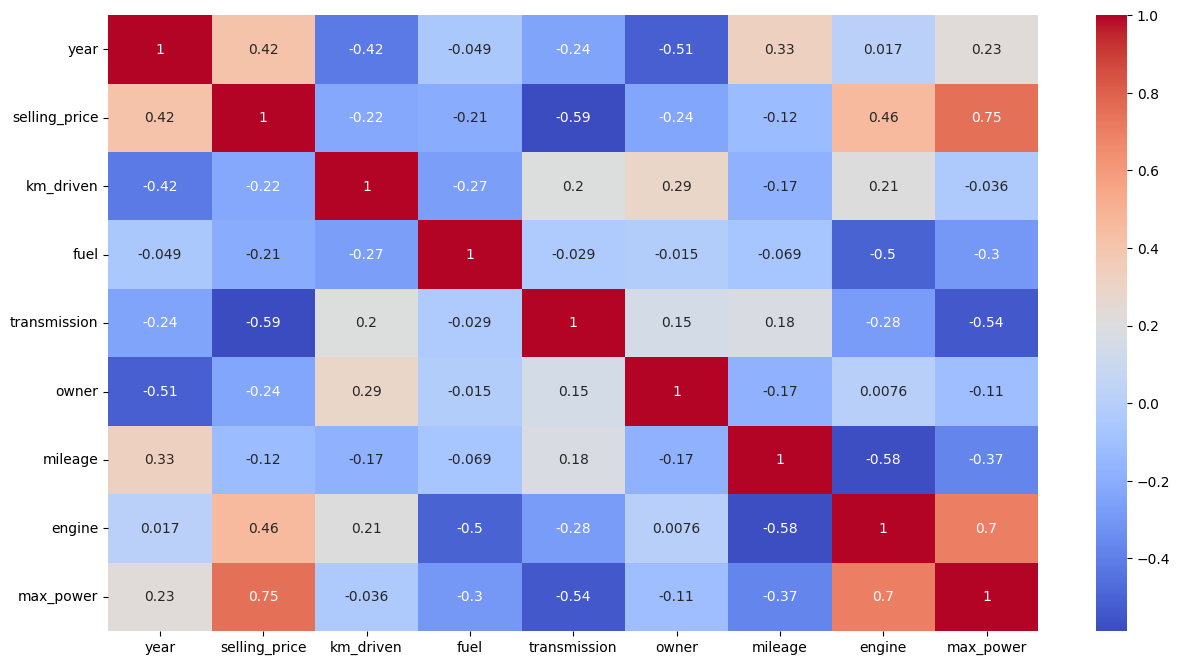

In [665]:
#drop brand columns
df = df.drop(columns=['brand'])

# Drop the original 'seller_type' column if it's no longer needed
df = df.drop(columns=['seller_type'])

# Drop the original 'seats' column if it's no longer needed
df = df.drop(columns=['seats'])

# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Null Values

In [666]:
#Check for Null Values
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
dtype: int64

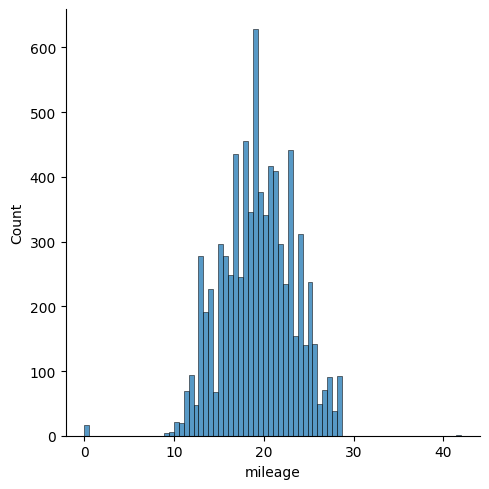

In [667]:
sns.displot(df.mileage)

In [668]:
#Fill out mileage with mean

df['mileage'].fillna(df['mileage'].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31776\2088284964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].mean(), inplace=True)


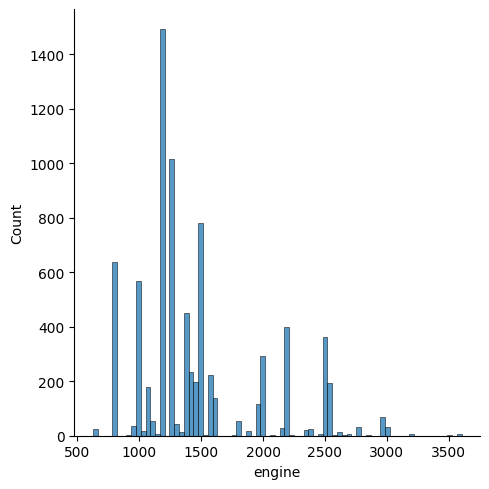

In [669]:
sns.displot(df.engine)

In [670]:
#Fill out engine with median

df['engine'].fillna(df['engine'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31776\2990182329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(), inplace=True)


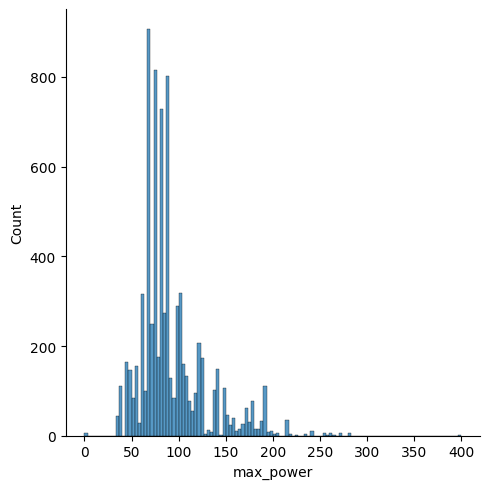

In [671]:
sns.displot(df.max_power)

In [672]:
#Fill out max_power with median

df['max_power'].fillna(df['max_power'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31776\1770132938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].median(), inplace=True)


In [673]:
#check the missing value in df data set
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
dtype: int64

## Modeling

In [674]:
#x is our strong features
X = df[["year", "mileage", "km_driven", "owner"]]

#y is simply the life expectancy col
y = np.log(df['selling_price'])

Train Test Split

In [675]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

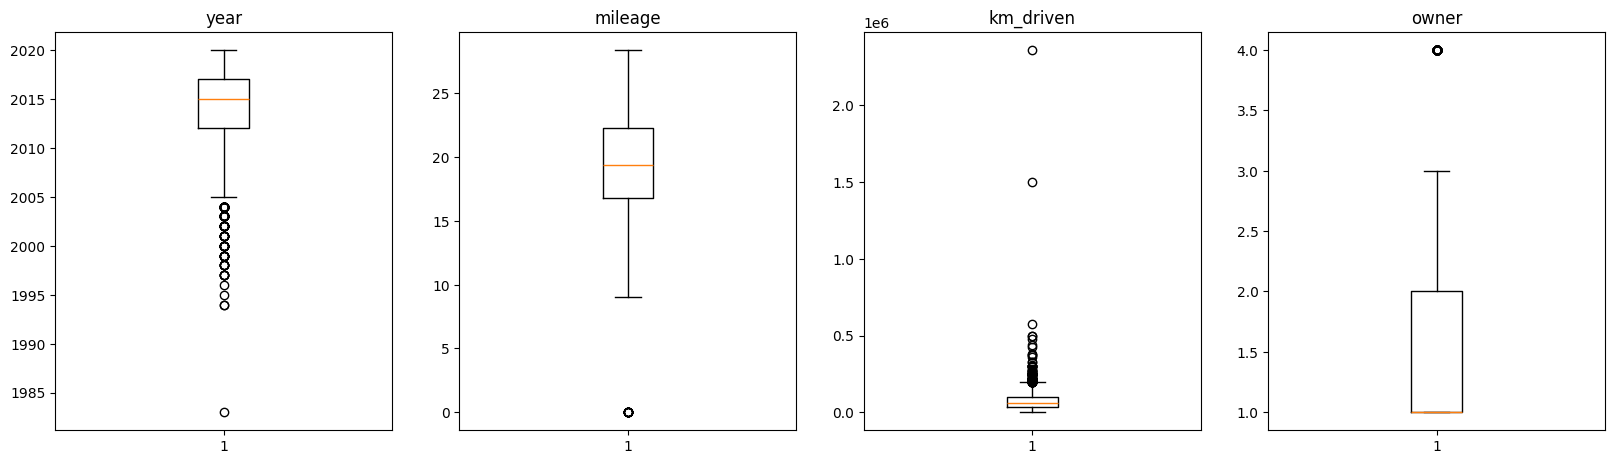

In [676]:
#Check Outliers:

# Create a dictionary of columns.
col_dict = {'year':1,'mileage':2, "km_driven":3, "owner":4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [677]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [678]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------owner---------------

Number of outliers: 110
Percent of data that is outlier: 1.96%


## Scaling

In [679]:
#Scaling
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#x = (x - mean) / std
#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <====current way
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <---another way
# (x - x_min) / (x_max - x_min)
#---> when your data DOES NOT follow normal distribution (e.g., audio, signal, image)

In [680]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [681]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.292605821944841
r2:  0.5841226608537414


In [682]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [683]:
y_train.isna().sum()

np.int64(0)

In [684]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.29268865 -0.29177165 -0.29791767 -0.2881384  -0.30161138]; Mean: -0.29442555105501367
SVR - Score: [-0.24887286 -0.26652474 -0.25709212 -0.24978998 -0.26422019]; Mean: -0.25729997937552407
KNeighbors Regressor - Score: [-0.20427689 -0.22006364 -0.18738396 -0.22506008 -0.19738363]; Mean: -0.20683364269558197
Decision-Tree Regressor - Score: [-0.21177078 -0.20573454 -0.21854234 -0.18953024 -0.20605703]; Mean: -0.20632698721121107
Random-Forest Regressor - Score: [-0.12423819 -0.11865886 -0.12699913 -0.1009597  -0.1251376 ]; Mean: -0.11919869654471668


In [685]:
#Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.292605821944841
r2:  0.5841226608537414


In [686]:

#SVR
from sklearn.svm import SVR  
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR()  
svr.fit(X_train, y_train)
yhat = svr.predict(X_test)  

print("MSE: ", mean_squared_error(y_test, yhat))  
print("r2: ", r2_score(y_test, yhat)) 

MSE:  0.24796786778824667
r2:  0.647566079293572


In [687]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)  
dt.fit(X_train, y_train)  
yhat = dt.predict(X_test)  

print("MSE: ", mean_squared_error(y_test, yhat)) 
print("r2: ", r2_score(y_test, yhat))

MSE:  0.19346449136944363
r2:  0.7250311106073086


In [688]:
#KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train, y_train) 
yhat = knn.predict(X_test)  

print("MSE: ", mean_squared_error(y_test, yhat)) 
print("r2: ", r2_score(y_test, yhat))

MSE:  0.1975988229435675
r2:  0.7191550319880694


In [689]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)  
rf.fit(X_train, y_train)  
yhat = rf.predict(X_test)  

print("MSE: ", mean_squared_error(y_test, yhat))  
print("r2: ", r2_score(y_test, yhat))  

MSE:  0.1093653398562221
r2:  0.8445602817061999


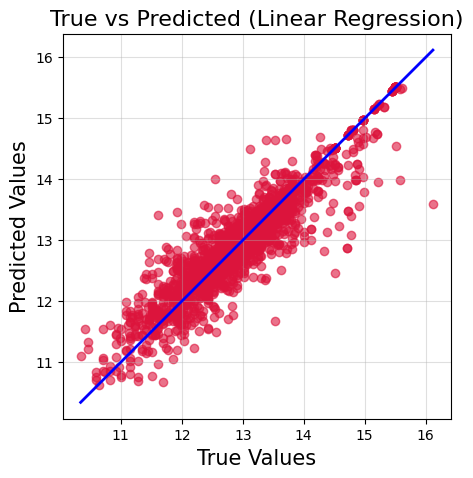

In [690]:
import matplotlib.pyplot as plt 

# Plot True vs Predicted values
plt.figure(figsize=(5, 5))
plt.scatter(y_test, yhat, c='crimson', alpha=0.6)

# Perfect prediction line
p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=2)

# Plot customization
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('True vs Predicted (Linear Regression)', fontsize=16)
plt.axis('equal')
plt.grid(alpha=0.4)
plt.show()

In [691]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [692]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [693]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [694]:
best_mse  # ignore the minus because it's neg_mean_squared_error

np.float64(-0.1274178959626729)

## Testing

In [695]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.11523154163712589

In [696]:
yhat = np.exp(yhat) #expo back 
print(yhat)

[257877.57961826 896201.37235853 297484.30661195 ... 325119.87052924
 813496.21899056 326362.00053855]


## Analysis

Algorithm way

In [697]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.5309265 , 0.35522319, 0.09760263, 0.01624768])

<BarContainer object of 4 artists>

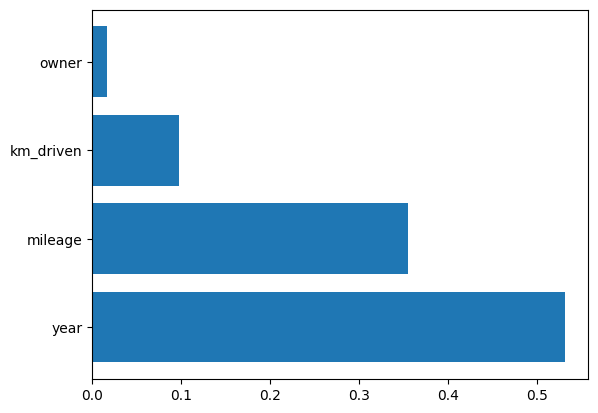

In [698]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

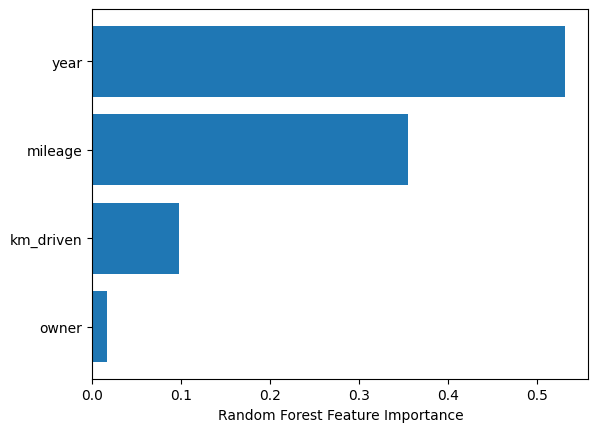

In [699]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Permutation Way

Text(0.5, 0, 'Random Forest Feature Importance')

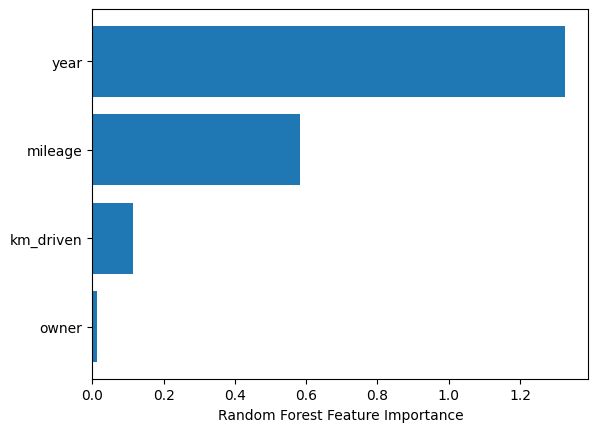

In [700]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Shap way

In [701]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

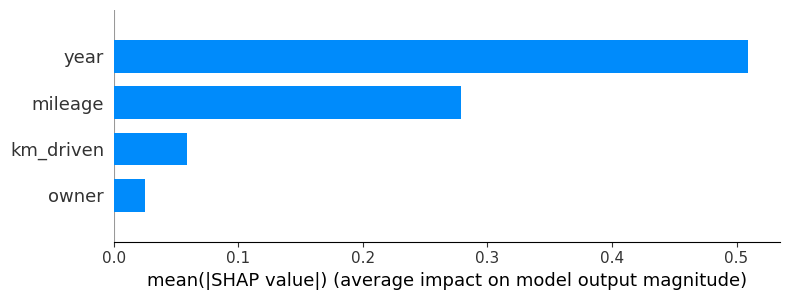

In [702]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## Inference

In [709]:
import joblib

# Save the fitted RandomForest model and scaler together
filename = "selling_price.model"
joblib.dump((rf, scaler), "selling_price.model")
print("Model and scaler saved to selling_price.model")

Model and scaler saved to selling_price.model


In [710]:
df[['year', 'mileage', 'km_driven', 'owner', 'selling_price']].loc[1]

year               2014.00
mileage              21.14
km_driven        120000.00
owner                 2.00
selling_price    370000.00
Name: 1, dtype: float64

In [711]:
#['year', 'km_driven', 'mileage', 'owner] 
sample = np.array([[2014, 120000.000, 21.14, 2]])

selling_price = loaded_model.predict(sample)
selling_price

array([13.60460035])

## Task 2

1. Which features significantly impact predictions, and which do not? Why?

From the data above it seems that the 2 features that most significantly affect the selling price of a vehicle is the "year" the vehicle was released and the "mileage" of the car. On the other hand the number of owners and the fuel type of the engine does not affect the price of the car. This is likely due to the fact that newer cars are released every year and the make and model of recent cars are more competitive with the current market. In addition, the mileage most likely matters more to buyers because while the number of owners would seem significant, as that would mean the car has been through multiple users, a higher amount of owners does not necessarily contribute to a higher mileage which is a more accurate measure on the wear and tear of a car.

2. Which algorithms performed well, and which did not? Why?

The best overall performer for algorithms was the random forrest regressor model as it boasts the highest R^2 value (0.84). This algorithm usually performs well when predicting continuous values when overfitting is a concern. In contrast, the SVR model which tends to perform worse when there is a large and noisy dataset. From this we can conclude that the dataset used to train these models was likely too "messy" with more features than samples. A way to combat this would be to choose smaller but more relevant features with a more refined dataset.